In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

X= df.drop(['median_house_value'], axis=1)
y= df['median_house_value']

In [8]:
X_train, X_test , y_train, y_test =train_test_split(X, y, test_size=0.2)

In [9]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

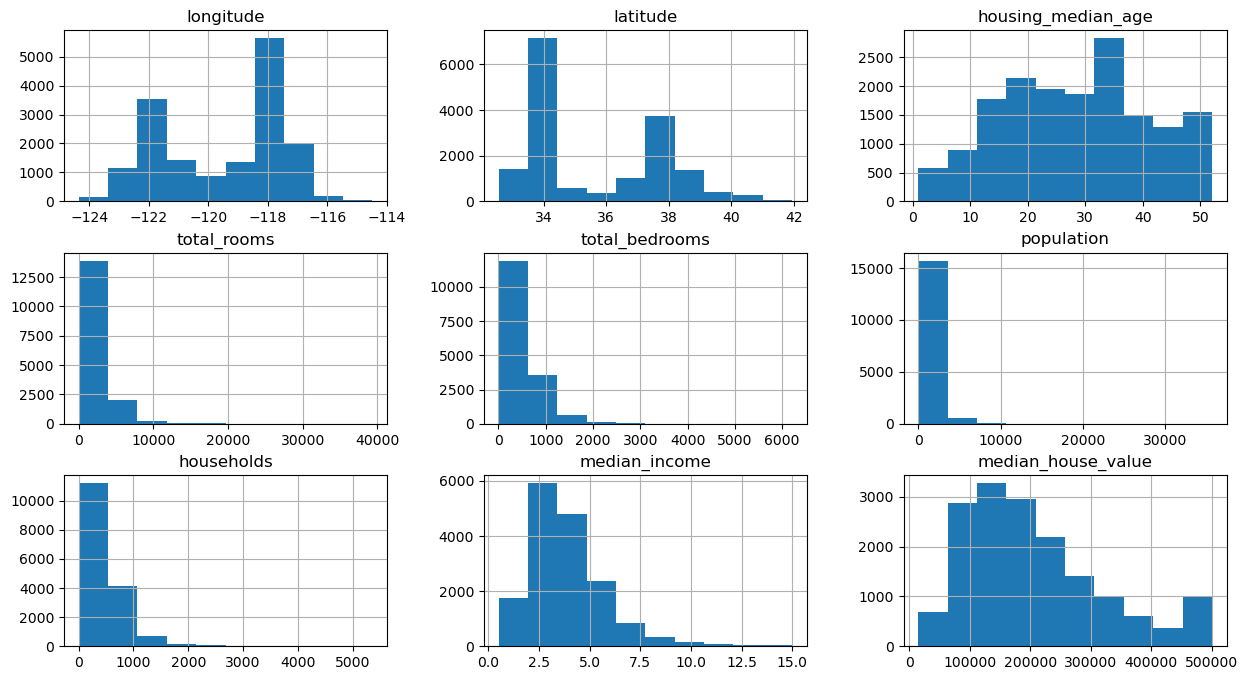

In [10]:
train_data.hist(figsize =(15,8))

C:\Users\HP\AppData\Local\Temp\ipykernel_19384\132729489.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True, cmap='YlGnBu')


<Axes: >

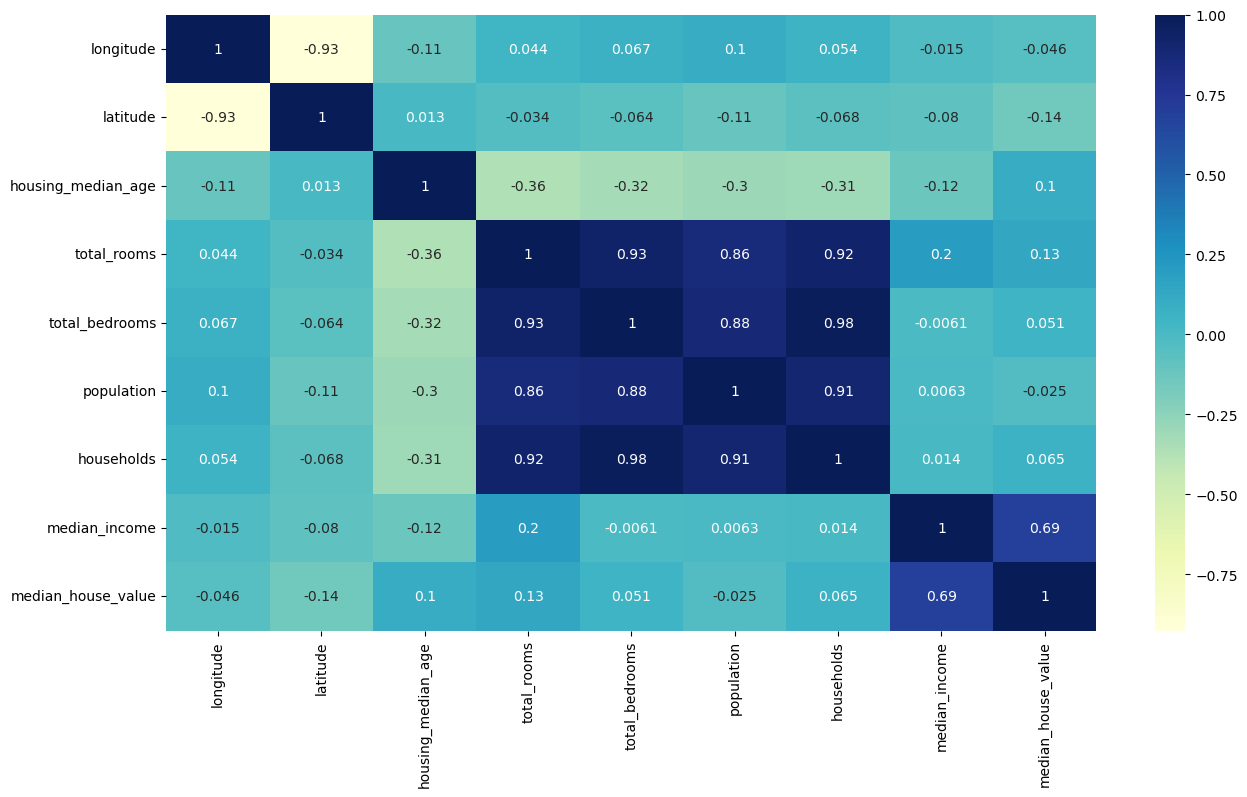

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap='YlGnBu')


In [12]:
train_data['total_rooms'] =np.log(train_data['total_rooms'] +1)
train_data['total_bedrooms'] =np.log(train_data['total_bedrooms'] +1)
train_data['population'] =np.log(train_data['population'] +1)
train_data['households'] =np.log(train_data['households'] +1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

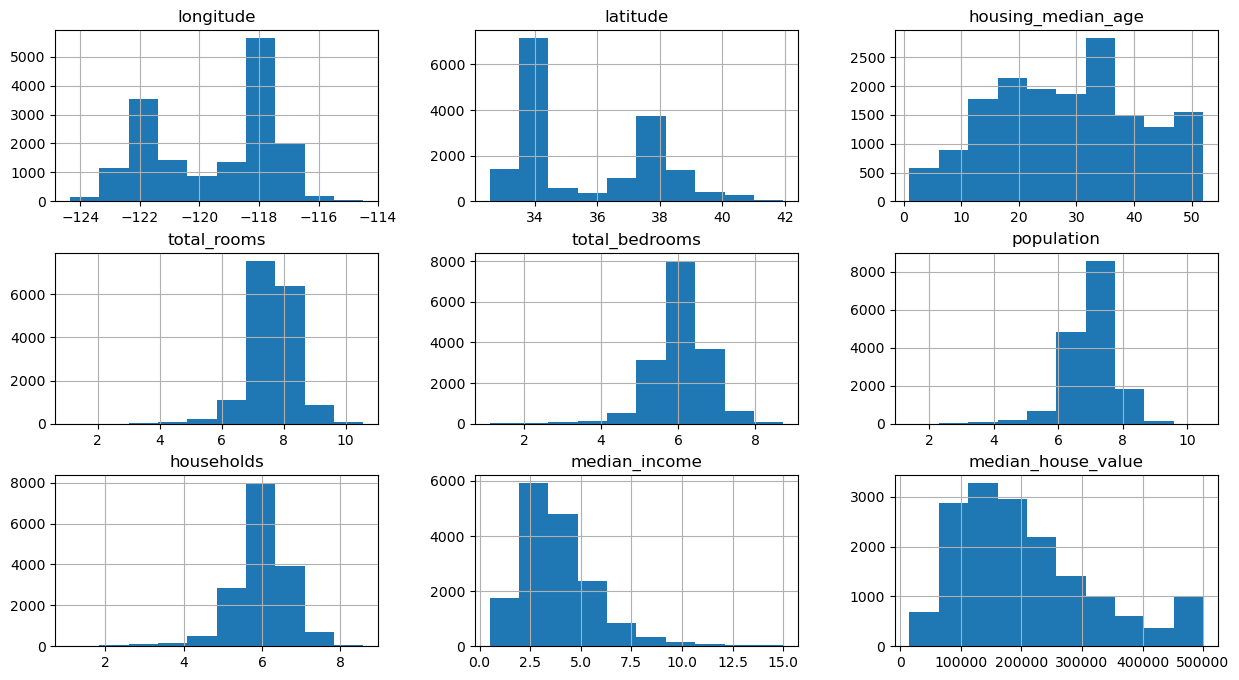

In [13]:
train_data.hist(figsize =(15,8))

In [14]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7210
INLAND        5197
NEAR OCEAN    2118
NEAR BAY      1817
ISLAND           4
Name: ocean_proximity, dtype: int64

In [15]:
train_data= train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

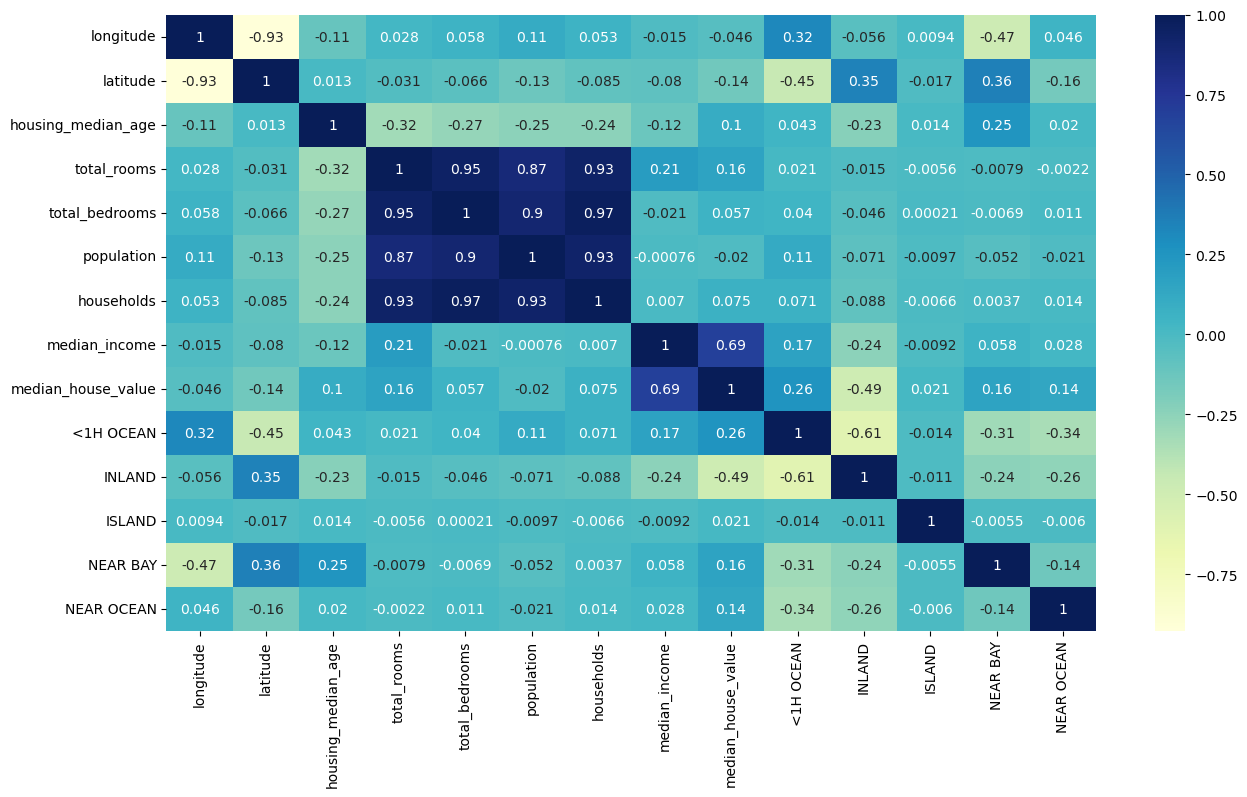

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap='YlGnBu')

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9929,-122.32,38.29,21.0,7.382746,5.877736,6.727432,5.866468,2.3787,177900.0,0,0,0,1,0
15517,-117.07,33.15,15.0,8.004700,6.259581,7.116394,6.222576,3.2024,180400.0,1,0,0,0,0
2394,-119.40,37.09,22.0,7.701652,6.169611,6.651572,5.666427,3.3269,102700.0,0,1,0,0,0
9479,-123.35,39.40,27.0,7.186901,5.826000,6.659294,5.793014,1.8500,71800.0,1,0,0,0,0
12765,-121.41,38.62,21.0,8.089789,6.638568,7.459339,6.602588,2.5162,97500.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18766,-122.26,40.58,14.0,7.839919,6.146329,7.148346,6.084499,3.9762,138500.0,0,1,0,0,0
13027,-121.22,38.67,20.0,7.253470,5.424950,6.552508,5.429346,4.0500,130700.0,0,1,0,0,0
7717,-118.13,33.94,34.0,6.259581,4.934474,5.924256,4.941642,3.5481,265000.0,1,0,0,0,0
3563,-118.56,34.23,36.0,8.075894,6.272877,7.444833,6.291569,5.5126,248400.0,1,0,0,0,0


<Axes: xlabel='latitude', ylabel='longitude'>

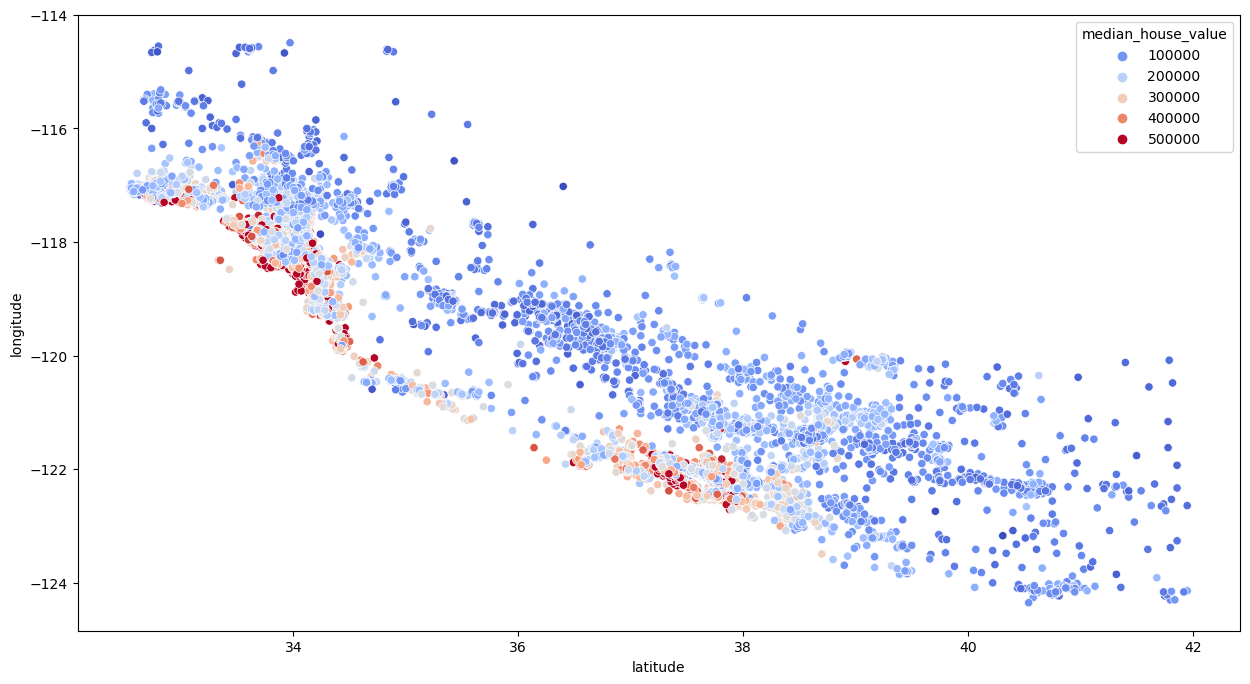

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data =train_data, hue='median_house_value', palette='coolwarm')

In [19]:
train_data['bedroom_ratio'] =train_data['total_bedrooms']/train_data['total_rooms']
train_data['households_rooms'] =train_data['total_rooms']/train_data['households']

<Axes: >

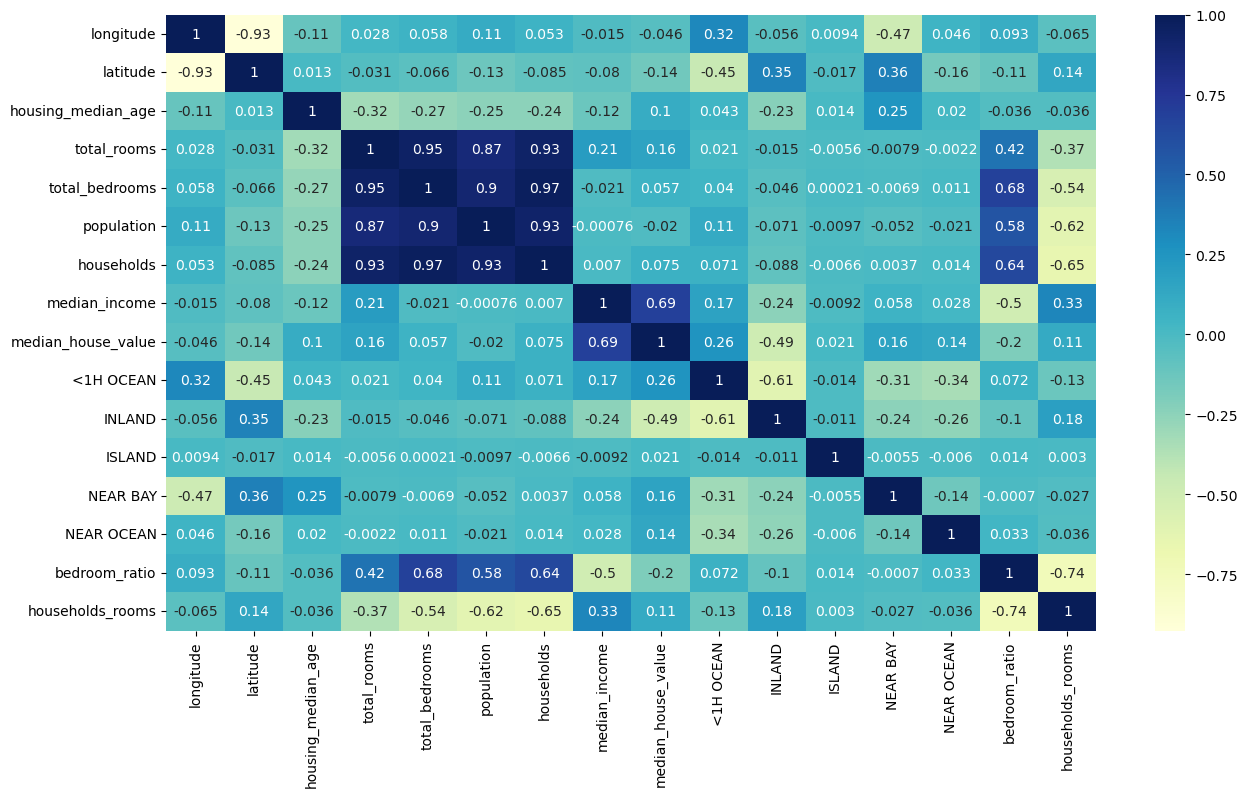

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap='YlGnBu')

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train , y_train=train_data.drop(['median_house_value'], axis =1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg =LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [22]:
test_data = X_test.join(y_test)

test_data['total_rooms'] =np.log(test_data['total_rooms'] +1)
test_data['total_bedrooms'] =np.log(test_data['total_bedrooms'] +1)
test_data['population'] =np.log(test_data['population'] +1)
test_data['households'] =np.log(test_data['households'] +1)

test_data= test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] =test_data['total_bedrooms']/test_data['total_rooms']
test_data['households_rooms'] =test_data['total_rooms']/test_data['households']




In [23]:
X_test, y_test = test_data.drop(['median_house_value'], axis =1), test_data['median_house_value']

In [24]:
X_test_s = scaler.transform(X_test)

In [25]:
reg.score(X_test_s, y_test)

0.6729130852026844

In [28]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
forest.score(X_test, y_test)

0.8239653203583045